# Transformation

Image transformations can be divided into **Affine** and **Non-Affine**.

**1) Affine transformation**

Is a generalization of Eucliden transformation (preserves distances, (more [here](https://en.wikipedia.org/wiki/Rigid_transformation))). The affine transformation preserve ratios of distances between points lying on a straight line. . It is used to correct distortion. The affine transformation is used for scaling, skewing and rotation.

The general representation of affine matrix is:

$\begin{bmatrix}a1 & a2 & b1\\a3 & a4 & b2\\c1 & c2 & 1\end{bmatrix}$

Where:

$\begin{bmatrix}a1 & a2 \\a3 & a4 \end{bmatrix}$ is the rotation matrix, which defines the transformation that will be performed (scaling, skewing and rotation).

$\begin{bmatrix}b1\\b2\end{bmatrix}$ is the translation vector, which moves the points. $b1$ represents the shift along the x-axis and $b2$ along the vertical axis.

$\begin{bmatrix}c1 & c2 \end{bmatrix}$ is the translation vector, which is = 0 for affice transformations

Given $x$ and $y$ as coordinates of a point, the transformamed coordinates $x'$ and $y'$ can be achieved by

$\begin{bmatrix}a1 & a2 & b1\\a3 & a4 & b2\\c1 & c2 & 1\end{bmatrix}$ $\times$ $\begin{bmatrix}x\\y\\1\end{bmatrix}$ = $\begin{bmatrix}x'\\y'\\1\end{bmatrix}$


1.1) Translation

All points are translated to new positions by adding offsets. $cv2.warpAffine$ to implement translations.

T= $\begin{bmatrix}1 & 0 & Tx\\0 & 1 & Ty\end{bmatrix}$ is the translation matrix

**2) Non-affine transformation (aka Projective transform or Homography):**

It is transformation that maps lines to lines (but does not necessarily preserve parallelism). It does preserve co-linearity and incidence. Non-affine transforms result when the third row of the transform matrix is set to values other than 0, 0, and 1. It is generated by different camera angles.

In [3]:
import cv2
import urllib
from skimage import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

import warnings
warnings.filterwarnings('ignore')

## Translation

In [4]:
image = cv2.imread("./images/out_3.png")

In [5]:
# store heigh and width of image
height, width = image.shape[:2]

In [6]:
# I will move the image 1/4 of the heigh and width in y and y
quarter_height, quarter_width = height/4, width/4

In [9]:
# create the translation matrix
T = np.float32([[1,0, quarter_width], [0, 1, quarter_height]])

In [10]:
# translate the image
img_translation = cv2.warpAffine(image, T, (width, height))

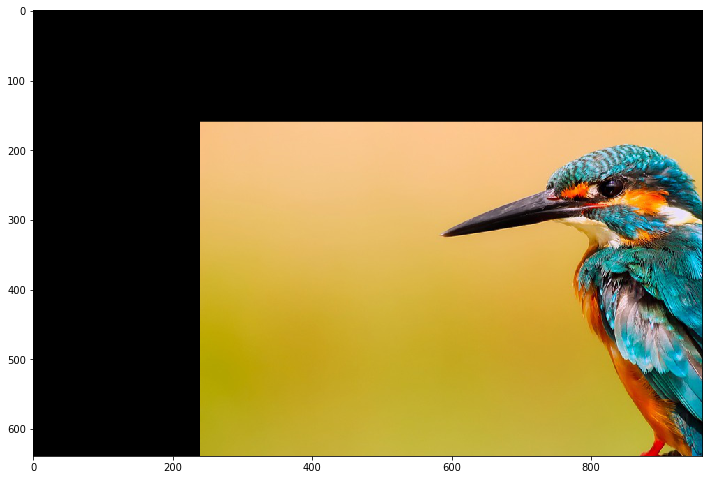

In [11]:
# Because I am viewing here:
#cv2.imshow('Translation', img_translation)
#cv2.waitKey()
#cv2.destroyAllWindows()
RGB_image = cv2.cvtColor(img_translation, cv2.COLOR_BGR2RGB)
io.imshow(RGB_image)
io.show()